# Let's Make a Hybrid Model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('WELFake_Dataset.csv')

# Handle missing values by replacing NaN with empty string
data['text'] = data['text'].fillna('')

# Assuming the dataset has a 'text' column and 'label' column
X = data['text']
y = data['label']

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
model1 = LogisticRegression(max_iter=1000)
model2 = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
model3 = SVC(kernel='linear', probability=True)

# Combine the models using a voting classifier
hybrid_model = VotingClassifier(estimators=[
    ('lr', model1),
    ('dt', model2),
    ('svc', model3)
], voting='soft')

# Train the hybrid model
hybrid_model.fit(X_train, y_train)

# Make predictions
y_pred = hybrid_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9480834546336729
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7089
           1       0.94      0.96      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



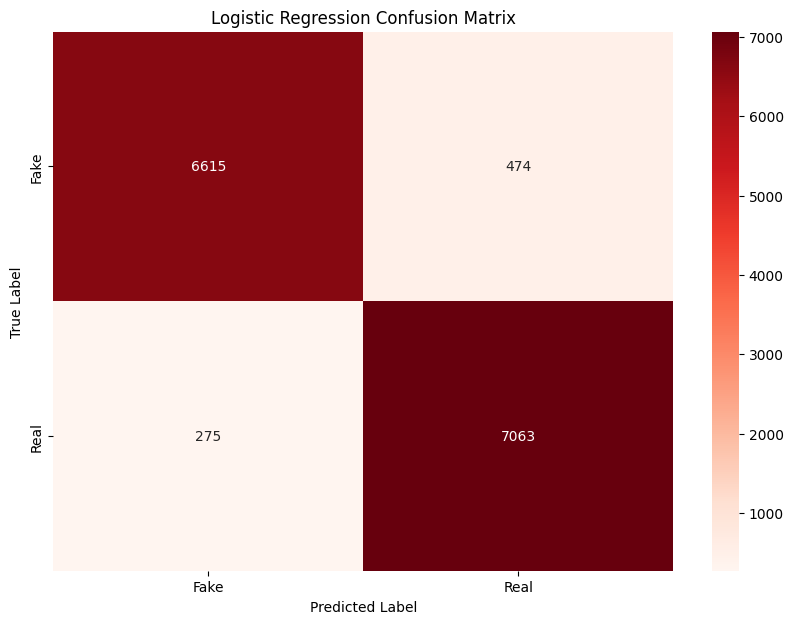

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.title('Hybrid Model Confusion Matrix')
plt.title('Logistic Regression Confusion Matrix')

plt.show()


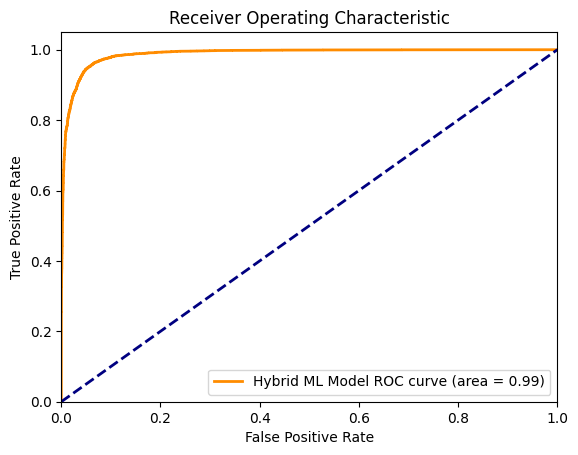

In [3]:
from sklearn.metrics import roc_curve, auc


# Generate ROC Curve
# Get the predicted probabilities
y_prob = hybrid_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Hybrid ML Model ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()